In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom



In [2]:
h = np.linspace(0.0, 1.0, num=1000)[1::] # exclude the first because it can diverge
kappa = np.arange(0,300)
k = np.arange(0,200)

0.9907784856675251

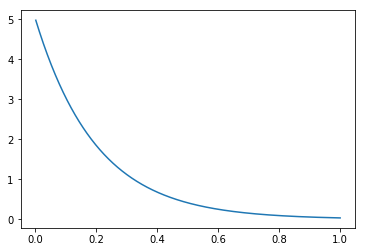

In [3]:
def _rho(alpha=1.0, x_0=0.2):
    # Weibull distribution
    return alpha/x_0*(h/x_0)**(alpha-1) * np.exp( -(h/x_0)**alpha )
    
rho = _rho()
plt.plot(h, rho)
dh = h[1]-h[0]
np.sum(rho)*dh

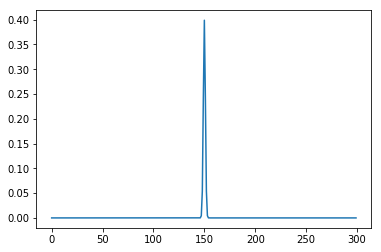

In [4]:
def _p_kappa():
    # normal distribution (for now)
    mean = 150.0
    sigma = 1.0
    return 1.0/math.sqrt(2.0*math.pi*sigma**2) * np.exp( -(kappa-mean)**2/(2.0*sigma**2) )

p_kappa = _p_kappa()
plt.plot(kappa,p_kappa)

In [5]:
def r(h1, h2):
    # generalized mean
    #return np.minimum(h1,h2)
    return np.maximum(h1,h2)

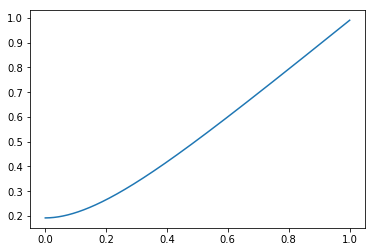

In [6]:
def _r_bar_h():
    # sum_{h'} rho(h') r(h,h')
    h_prime = np.copy(h)
    dh = h_prime[1] - h_prime[0]
    h_prime = h_prime.reshape( [1,h_prime.shape[0]] )
    #print(h,h_prime)
    rhh = r(h.reshape([h.shape[0],1]), h_prime)
    dr = rhh*rho*dh
    #print(dr)
    return np.sum(dr,axis=1)
    
r_bar_h = _r_bar_h()
plt.plot(h, r_bar_h)

In [7]:
def r_bar():
    dh = h[1]-h[0]
    y = r_bar_h * rho
    return np.sum(y)*dh

r_bar()

0.28295231876030735

(200, 999, 300)


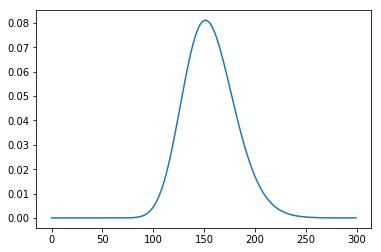

In [8]:
def _propagator():
    # g(k|h,kappa) = \binom(kappa, k) r(h)^k ( 1-r(h))^{kappa-k}
    p = r_bar_h
    _p = p.reshape([p.shape[0],1])
    #print(p, _kappa)
    b = binom(kappa, _p)
    _k = k.reshape([k.shape[0],1,1])
    #print(_k)
    return b.pmf(_k)

#k = np.array([9,10,11])
#_k = np.arange(0,100)
#h = np.array( [0.2,0.3,0.4,0.5] )
#_h = np.linspace(0.0, 1.0, num=100)[1::]
#kappa = np.array([100,110,120,130,140])
#_kappa = np.arange(0,150)
g = _propagator()
print(g.shape)
#plt.plot(k, g[:,50,100])
#plt.plot(h, g[20,:,100])
plt.plot(kappa, g[30,50,:])

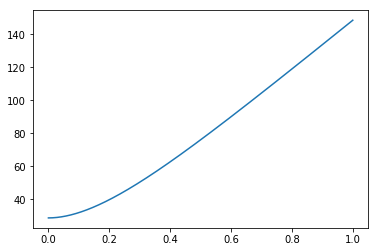

In [9]:
def _k_bar_h():
    kappa_mean = np.sum( p_kappa * kappa )
    #print(kappa_mean)
    return kappa_mean * r_bar_h

k_bar_h = _k_bar_h()
plt.plot(h, k_bar_h)

array([2.51549137e-15, 9.09081329e-14, 1.63261746e-12, 1.94268278e-11,
       1.72307432e-10, 1.21511459e-09, 7.09691481e-09, 3.53099073e-08,
       1.52776353e-07, 5.83973578e-07])

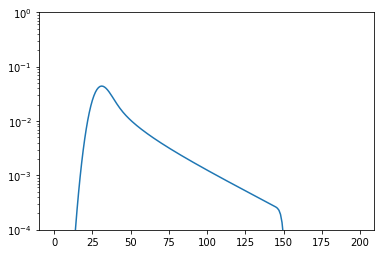

In [10]:
def _P_k():
    dh = h[1] - h[0]
    #g = propagator(k,h,kappa)
    g_rho = g * rho.reshape([1,h.shape[0],1])
    gh = np.sum(g_rho, axis = 1) * dh
    gh_Pkappa = gh * p_kappa.reshape([1, kappa.shape[0]])
    return np.sum(gh_Pkappa, axis = 1)

P_k = _P_k()
plt.yscale("log")
plt.ylim(1.0e-4,1)
plt.plot(k, P_k)
P_k[0:10]

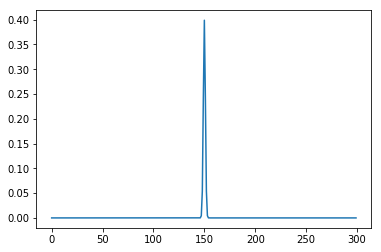

In [11]:
def _kappa_nn_kappa():
    # tentatively assume P(kappa'|kappa) = P(kappa)
    return np.copy(p_kappa)

kappa_nn_kappa = _kappa_nn_kappa()
plt.plot(kappa, kappa_nn_kappa)

(999, 1) (1, 999) (999, 999)


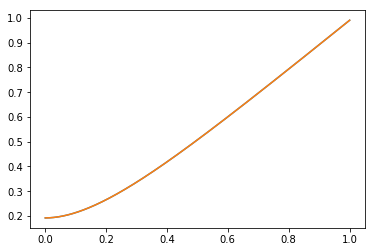

In [15]:
def _r_nn_h():
    h_prime = np.copy(h).reshape([h.shape[0],1])
    rho2 = rho.reshape([h.shape[0],1])
    r_bar_h2 = r_bar_h.reshape([h.shape[0],1])
    h_T = np.copy(h).reshape([1,h.shape[0]])
    denom = _r_bar_h().reshape([1,h.shape[0]])
    dh = h[1]-h[0]
    print( h_prime.shape, h_T.shape, r(h_prime, h_T).shape )
    return np.sum( rho2 * r_bar_h * r(h_prime, h_T) / denom, axis=0 ) * dh
    
r_nn_h = _r_nn_h()
plt.plot(h, r_nn_h)
plt.plot(h, r_bar_h)  # bug...

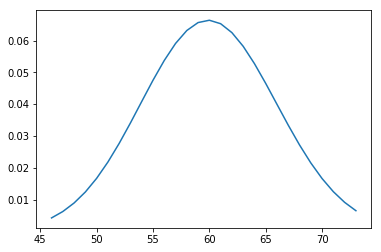

In [13]:
n=150
p = 0.4
b = binom(n,p)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.plot(x, b.pmf(x))